In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/microglia_scatac/ATAC/summary.mean.variant_scores_new.tsv", sep="\t")


In [3]:
cols = ["Z_score_perPeak", "PeakID",  "pVal_perPeak" , "FDR_acrossAllPeaks" , "caQTL_order" ,  "Variant", "Beta",  "Z_score_fixed" , "Z_score_random"]
meta_data = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/microglia_caqtls/Rousonly_sig.tsv", sep="\t", header=None)
meta_data[cols] = meta_data[4].str.split(",", expand=True)
meta_data[1] = meta_data[1] + 1


In [4]:
meta_data.shape

(4845, 14)

In [5]:
data.shape

(4845, 23)

In [6]:
data.head(1)

,chr,pos,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,...,max_percentile.mean,max_percentile.mean.pval,logfc_x_max_percentile.mean,abs_logfc_x_max_percentile.mean,abs_logfc_x_max_percentile.mean.pval,jsd_x_max_percentile.mean,jsd_x_max_percentile.mean.pval,abs_logfc_x_jsd_x_max_percentile.mean,abs_logfc_x_jsd_x_max_percentile.mean.pval,logfc_x_jsd_x_max_percentile.mean
0,chr2,199884843,A,G,chr2_199884843_A_G,-0.032774,0.032774,0.332132,0.016354,0.086955,...,0.001383,0.946404,-0.000056,0.000056,0.776187,0.000023,0.849053,0.000001,0.649606,-0.000001


In [7]:
meta_data.head(1)

,0,1,2,3,4,Z_score_perPeak,PeakID,pVal_perPeak,FDR_acrossAllPeaks,caQTL_order,Variant,Beta,Z_score_fixed,Z_score_random
0,chr2,199884843,A,G,"-8.42764,Peak--100075,2.78246e-16,1.2455357872...",-8.42764,Peak--100075,2.78246e-16,1.2455357872766899e-13,1,rs281785,1.29318,10.11,10.11


In [8]:
new_data = data.merge(meta_data, left_on=["chr", "pos", "allele1", "allele2"], right_on=[0,1,2,3]).drop_duplicates()

In [9]:
new_data.shape

(4845, 37)

In [10]:
new_data.columns

Index([                                       'chr',
                                              'pos',
                                          'allele1',
                                          'allele2',
                                             'rsid',
                                       'logfc.mean',
                                   'abs_logfc.mean',
                              'abs_logfc.mean.pval',
                                         'jsd.mean',
                                    'jsd.mean.pval',
                                 'logfc_x_jsd.mean',
                             'abs_logfc_x_jsd.mean',
                        'abs_logfc_x_jsd.mean.pval',
                              'max_percentile.mean',
                         'max_percentile.mean.pval',
                      'logfc_x_max_percentile.mean',
                  'abs_logfc_x_max_percentile.mean',
             'abs_logfc_x_max_percentile.mean.pval',
                        'jsd_x_max_percentile.

In [11]:
import numpy as np
new_data["jsd_sign"] = new_data["jsd.mean"]*np.sign(new_data["logfc.mean"])

Text(0.5, 1.0, 'Pearsonr = 0.19')

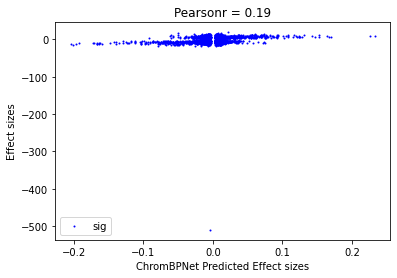

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter(new_data["jsd_sign"], new_data["Z_score_fixed"].astype(float), s=1, c="b", label="sig")


plt.xlabel("ChromBPNet Predicted Effect sizes")
plt.ylabel("Effect sizes")
plt.legend()
plt.title("Pearsonr = "+str(np.round(pearsonr(new_data["jsd_sign"], new_data["Z_score_fixed"].astype(float))[0],2)))


In [13]:
new_data["pos1"] = new_data["pos"] + 1

In [14]:
old_cols = new_data.columns
new_cols  = ["chr", "pos", "pos1"] + old_cols[2:-1].tolist()
new_data[new_cols]

,chr,pos,pos1,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,...,Z_score_perPeak,PeakID,pVal_perPeak,FDR_acrossAllPeaks,caQTL_order,Variant,Beta,Z_score_fixed,Z_score_random,jsd_sign
0,chr2,199884843,199884844,A,G,chr2_199884843_A_G,-0.032774,0.032774,0.332132,0.016354,...,-8.42764,Peak--100075,2.78246e-16,1.2455357872766899e-13,1,rs281785,1.29318,10.11,10.11,-0.016354
1,chr2,200357680,200357681,A,T,chr2_200357680_A_T,0.008075,0.010583,0.651006,0.009565,...,-4.61924,Peak--100119,9.151825e-05,0.0055224342891336,1,rs2033804,-0.396164,-3.48053,4.61828,0.009565
2,chr2,200656660,200656661,T,C,chr2_200656660_T_C,-0.003838,0.006359,0.780543,0.004759,...,-4.74954,Peak--100143,0.0004913505,0.0227224447069548,1,rs2287012,-0.498759,-5.07707,5.07707,-0.004759
3,chr1,172585461,172585462,A,G,chr1_172585461_A_G,-0.005939,0.007671,0.726790,0.004529,...,9.37451,Peak--10016,3.808717e-19,2.5325626120453097e-16,1,rs10752994,-1.07082,-11.418,11.418,-0.004529
4,chr1,172625478,172625479,C,T,chr1_172625478_C_T,0.441283,0.441283,0.006659,0.047415,...,8.27532,Peak--10018,8.27175e-15,3.01341025797872e-12,1,rs12123755,0.816922,8.27532,nan,0.047415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,chr2,197453059,197453060,C,T,chr2_197453059_C_T,-0.006069,0.008629,0.698217,0.003760,...,4.76994,Peak--99809,1.825632e-05,0.001357736877756,1,rs3731570,0.828246,6.83333,7.11778,-0.003760
5633,chr2,198097196,198097197,A,G,chr2_198097196_A_G,0.164370,0.164370,0.062254,0.017252,...,6.07593,Peak--99845,9.899754e-08,1.19650756197882e-05,1,rs3771359,0.436354,6.07593,nan,0.017252
5634,chr2,198097200,198097201,T,C,chr2_198097200_T_C,-0.301757,0.301757,0.015373,0.028632,...,-4.63841,Peak--99846,0.0004810067,0.0223446806742482,1,rs3771360,-0.289109,-3.13403,4.55157,-0.028632
5635,chr2,198096665,198096666,T,G,chr2_198096665_T_G,-0.001873,0.005233,0.802049,0.007228,...,4.52954,Peak--99847,0.0007980153,0.033530677224908,1,rs1946645,0.17223,3.28067,6.7752,-0.007228


In [15]:
#new_data[new_cols].to_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/microglia_scatac/bed_formatter_regions.bed", sep="\t", header=False, index=False)



In [16]:
new_scores = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/microglia_scatac//peak_overlaps_scored.bed", sep="\t", names=new_cols+["peak_overlap"])

In [17]:
new_scores = new_scores.drop_duplicates()
new_scores["peak_overlap"] = new_scores["peak_overlap"]>0

In [19]:
#new_scores

Text(0.5, 1.0, 'Pearsonr = 0.6')

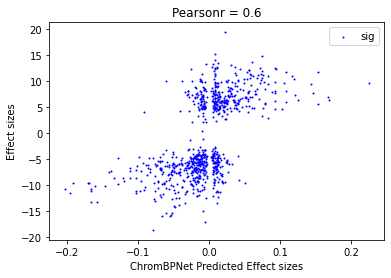

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter(new_scores[new_scores["peak_overlap"]]["jsd_sign"], new_scores[new_scores["peak_overlap"]]["Z_score_fixed"].astype(float), s=1, c="b", label="sig")


plt.xlabel("ChromBPNet Predicted Effect sizes")
plt.ylabel("Effect sizes")
plt.legend()
plt.title("Pearsonr = "+str(np.round(pearsonr(new_scores[new_scores["peak_overlap"]]["jsd_sign"], new_scores[new_scores["peak_overlap"]]["Z_score_fixed"].astype(float))[0],2)))


In [21]:
pearsonr(new_scores[new_scores["peak_overlap"]]["jsd_sign"], new_scores[new_scores["peak_overlap"]]["Z_score_fixed"].astype(float))
                                                                                                                            
                                                                                                                            

(0.5955839856233681, 3.007089255611314e-78)

In [22]:
pearsonr(new_scores[new_scores["peak_overlap"]]["jsd_sign"], new_scores[new_scores["peak_overlap"]]["Beta"].astype(float))
                                                                                                                            
                                                                                                                            

(0.5879089521534093, 8.223950838059139e-76)

    sd_sign.mean     Beta  max_percentile.mean
4       0.047415  8.27532             0.127542
14      0.009463  5.55393             0.610502
20      0.060282  6.87351             0.732263
24      0.041271 -9.13315             0.519194
26     -0.056717 -6.28075             0.173048
num nan
0
(0.5955839856233681, 3.007089255611314e-78)


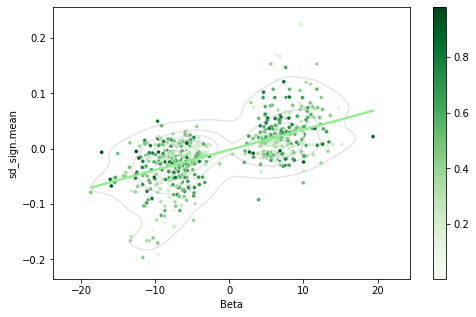

In [33]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 


data = pd.DataFrame()
data["sd_sign.mean"] = new_scores[new_scores["peak_overlap"]]["jsd_sign"]
data["Beta"] = new_scores[new_scores["peak_overlap"]]["Z_score_fixed"]
data["max_percentile.mean"] = abs(new_scores[new_scores["peak_overlap"]]["max_percentile.mean"])
print(data.head())
plt.figure(figsize=(8,5))

print("num nan")
print(sum(np.isnan(data["Beta"])))
print(scipy.stats.pearsonr(data["sd_sign.mean"], data["Beta"]))


sns.kdeplot(
    data=data,
    x="Beta",
    y="sd_sign.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)
ax = sns.scatterplot(x="Beta", y="sd_sign.mean", hue="max_percentile.mean", data=data, s=15, palette="Greens")
sns.regplot(x="Beta", y="sd_sign.mean", data=data, scatter=False, ci=None, color="#90EE90")
#sns.jointplot(x=data["Beta"], y=data["sd_sign.mean"],s=0,ax=ax)

norm = plt.Normalize(data['max_percentile.mean'].min(), data['max_percentile.mean'].max())
sm = plt.cm.ScalarMappable(cmap="Greens", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.savefig("subfigs_new/microglia_caqtls_scatter_plot.pdf", transparent=True, dpi=300)


In [41]:
from sklearn.decomposition import PCA
import scipy.stats
def get_pc_component(df1):
    val1 = df1["jsd.mean"].astype(float)*np.sign(df1['logfc.mean'].astype(float))
    val2 = df1["logfc.mean"].astype(float)
    val3 = df1["jsd.mean"].astype(float)*df1['logfc.mean'].astype(float)
    #val4 = df1["log_prob_log2s.mean"].astype(float)*df1['logfc.mean'].astype(float)

    #print(df1.shape)
    values = [val2, val3]
    values = np.array(values)
    #print(values.shape)
    values = np.transpose(values)
    mean_axis = np.mean(values, axis=1)
    new_values = PCA(n_components=1).fit_transform(X=values)
    #print(new_values.shape)
    if scipy.stats.pearsonr(new_values[:,0], mean_axis)[0] > 0:
        #print(scipy.stats.pearsonr(new_values[:,0], mean_axis)[0])
        return new_values[:,0]
    else:
        #print(scipy.stats.pearsonr(new_values[:,0], mean_axis)[0])
        return new_values[:,0]*-1

(4845,)
   sd_sign.mean     Beta  max_percentile.mean
0      0.447828  8.27532             0.127542
1      0.084226  5.55393             0.610502
2      0.195903  6.87351             0.732263
3      0.034144 -9.13315             0.519194
4     -0.510392 -6.28075             0.173048
num nan
0
(0.5888852424555341, 4.061736427196501e-76)


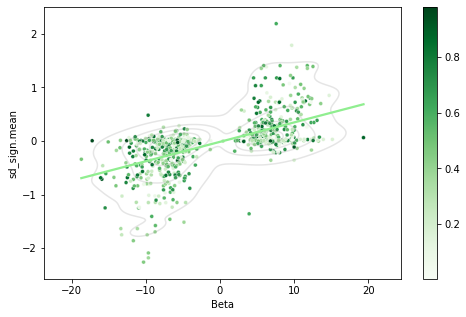

In [42]:

import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

temp = np.array(get_pc_component(new_scores))

data = pd.DataFrame()
data["sd_sign.mean"] = temp[new_scores["peak_overlap"].values]
data["Beta"] = new_scores[new_scores["peak_overlap"]]["Z_score_fixed"].values
data["max_percentile.mean"] = abs(new_scores[new_scores["peak_overlap"]]["max_percentile.mean"].values)

print(temp.shape)
print(data.head())
plt.figure(figsize=(8,5))

print("num nan")
print(sum(np.isnan(data["Beta"])))
print(scipy.stats.pearsonr(data["sd_sign.mean"], data["Beta"]))
sns.kdeplot(
    data=data,
    x="Beta",
    y="sd_sign.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)
ax = sns.scatterplot(x="Beta", y="sd_sign.mean", hue="max_percentile.mean", data=data, s=15, palette="Greens")
sns.regplot(x="Beta", y="sd_sign.mean", data=data, scatter=False, ci=None, color="#90EE90")
#sns.jointplot(x=data["Beta"], y=data["sd_sign.mean"],s=0,ax=ax)

norm = plt.Normalize(data['max_percentile.mean'].min(), data['max_percentile.mean'].max())
sm = plt.cm.ScalarMappable(cmap="Greens", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)
#plt.savefig("subfigs_new/microglia_caqtls_scatter_plot.pdf", transparent=True, dpi=300)


In [43]:
# import matplotlib

# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42 

# from plotnine import * 

# p = (ggplot(data, aes('Observed', 'Predicted (ES)', color='max_percentile.mean'))
#  + geom_point(alpha=1,size=0.1)
#  + geom_smooth(method = "lm", se = False, color="black", size=0.2)
#  + xlab("Observed")
#  + scale_color_gradient(low='#ADD8E6', high='#0000FF')
#  + ylab("Predicted")
#  + theme_classic() 
# )
# p
# p.save("subfigs_new/microglia_caqtls_scatter_plot.pdf",dpi="300")
# #p.save("subfigs/bqtls_atac_significant_hits.pdf",dpi="300")

In [44]:
scipy.stats.pearsonr(new_scores[new_scores["peak_overlap"]]["logfc.mean"], new_scores[new_scores["peak_overlap"]]["jsd_sign"])

(0.9328741025093874, 0.0)

In [ ]:
scipy.stats.pearsonr(new_scores[new_scores["peak_overlap"]]["logfc.mean"], new_scores[new_scores["peak_overlap"]]["jsd_sign"])

In [58]:
scipy.stats.pearsonr(new_scores[new_scores["peak_overlap"]]["logfc.mean"], new_scores[new_scores["peak_overlap"]]["jsd.mean"]*new_scores[new_scores["peak_overlap"]]["logfc.mean"])



(0.897471131960564, 5.621909641650273e-287)

In [52]:
sum(new_scores["peak_overlap"])

803